<a href="https://colab.research.google.com/github/shay2222/Python-projects/blob/main/Financial_analysis_a_company_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is a machine learning model that deal with financially analyzing a company health and producing numerical data.

**How the Model Works and Why**:

**Initialization:** The model starts with a random internal state (representing financial indicators) and random reward weights.

**State Update:** The model updates its internal state to simulate changes in the company's financial performance.

**Ratio Calculation:** The model calculates financial ratios based on the current state.

**Reward Calculation:** The model calculates a reward based on the financial ratios, using the current reward weights.

**Reward Weight Adjustment:** The model adjusts the reward weights based on the current reward. If the reward is high, the weights of the indicators that contributed to it are increased.

**Iteration:** Steps 2-5 are repeated for a specified number of iterations.





**Important Considerations:**

**Simplification:** This model is a highly simplified representation of financial analysis. It doesn't account for many real-world factors.

**Parameter Tuning:** The performance of the model is sensitive to the choice of parameters (e.g., initial state, learning rate, ideal ratio values).


**Demonstration Only:** This model is intended for demonstration purposes only and should not be used for making financial decisions.

**Limited Scope:** The model only considers a few financial ratios. A comprehensive financial analysis would consider many more factors.

**No External Validation:** Because it doesn't use external data, there's no way to validate the model's accuracy.

In [ ]:
import numpy as np

class CompanyHealthModel:
    """
    A simplified machine learning model to assess company health based on
    internal financial ratios and indicators.  It does not require external
    data and learns through a self-adjusting reward system.

    This model is highly simplified and for demonstration purposes only.
    It's not a substitute for professional financial analysis.

    Key Indicators:
    - Current Ratio: Current Assets / Current Liabilities
    - Debt-to-Equity Ratio: Total Debt / Total Equity
    - Profit Margin: Net Income / Revenue
    - Return on Equity (ROE): Net Income / Total Equity
    """

    def __init__(self, initial_state=None):
        """
        Initializes the model with a random initial state.
        """
        if initial_state is None:
            self.state = np.random.rand(4)  # 4 indicators: Current Ratio, Debt-to-Equity, Profit Margin, ROE
        else:
            self.state = initial_state

        self.reward_weights = np.random.rand(4)  # Weights for each indicator in the reward function
        self.reward_weights /= np.sum(self.reward_weights) # Normalize to probabilities

    def calculate_ratios(self):
        """
        Simulates the calculation of financial ratios based on the current state.
        These are simplified representations.
        """
        current_ratio = self.state[0] * (1 + np.random.normal(0, 0.1))
        debt_to_equity = self.state[1] * (1 + np.random.normal(0, 0.1))
        profit_margin = self.state[2] * (1 + np.random.normal(0, 0.1))
        roe = self.state[3] * (1 + np.random.normal(0, 0.1))

        return current_ratio, debt_to_equity, profit_margin, roe

    def reward_function(self):
        """
        Calculates a reward based on the financial ratios.  The weights are
        learned through a simple adjustment mechanism.
        """
        current_ratio, debt_to_equity, profit_margin, roe = self.calculate_ratios()

        # Define desired ranges (these are just examples)
        ideal_current_ratio = 1.5
        ideal_debt_to_equity = 0.5
        ideal_profit_margin = 0.15
        ideal_roe = 0.10

        reward = (
            self.reward_weights[0] * np.exp(-((current_ratio - ideal_current_ratio) ** 2) / 2)
            + self.reward_weights[1] * np.exp(-((debt_to_equity - ideal_debt_to_equity) ** 2) / 2)
            + self.reward_weights[2] * np.exp(-((profit_margin - ideal_profit_margin) ** 2) / 2)
            + self.reward_weights[3] * np.exp(-((roe - ideal_roe) ** 2) / 2)
        )
        return reward

    def update_state(self):
        """
        Updates the internal state (financial indicators) based on a random
        perturbation.  This simulates changes in the company's financial
        performance.
        """
        self.state += np.random.normal(0, 0.05, 4)
        self.state = np.clip(self.state, 0, 2)  # Keep values within a reasonable range

    def adjust_reward_weights(self, reward):
        """
        Adjusts the reward weights based on the current reward.  This is a
        simplified learning mechanism.
        """
        # If the reward is high, increase the weight of the indicators that
        # contributed to it.  If the reward is low, decrease the weight.
        current_ratio, debt_to_equity, profit_margin, roe = self.calculate_ratios()

        # Simple proportional adjustment
        self.reward_weights[0] += 0.01 * (reward - 1) * current_ratio
        self.reward_weights[1] += 0.01 * (reward - 1) * debt_to_equity
        self.reward_weights[2] += 0.01 * (reward - 1) * profit_margin
        self.reward_weights[3] += 0.01 * (reward - 1) * roe

        self.reward_weights /= np.sum(self.reward_weights)  # Normalize

    def train(self, num_iterations=100):
        """
        Runs the simulation for a specified number of iterations.
        """
        for i in range(num_iterations):
            self.update_state()
            reward = self.reward_function()
            self.adjust_reward_weights(reward)

            if (i + 1) % 10 == 0:
                print(f"Iteration {i+1}: Reward = {reward}, State = {self.state}")

        print("Final State:", self.state)
        print("Final Reward Weights:", self.reward_weights)


# Example Usage:
model = CompanyHealthModel()
model.train(num_iterations=100)

Iteration 10: Reward = 0.792512453782259, State = [0.90047156 0.02846854 0.82325019 1.02802672]
Iteration 20: Reward = 0.7960155179692681, State = [0.89905308 0.1221006  1.1104702  1.17709368]
Iteration 30: Reward = 0.7756828269041858, State = [1.02520635 0.09681847 1.35085495 1.12390249]
Iteration 40: Reward = 0.8474275569100452, State = [1.06025328 0.06918439 1.43698186 0.96003557]
Iteration 50: Reward = 0.9258491483011797, State = [1.16481669 0.14041307 1.66303287 0.74297086]
Iteration 60: Reward = 0.8797559319071429, State = [1.1970986  0.06367607 1.7511941  1.07096945]
Iteration 70: Reward = 0.8615130601478674, State = [1.34852425 0.50791797 1.8813782  1.2136361 ]
Iteration 80: Reward = 0.8816659656094995, State = [1.44617625 0.62731542 1.70363725 1.29264279]
Iteration 90: Reward = 0.9549387274053012, State = [1.53749238 0.67958104 1.81052056 1.30895643]
Iteration 100: Reward = 0.9780006372072085, State = [1.49301789 0.53640366 1.53067411 1.23059618]
Final State: [1.49301789 0.536

**No External Data:** The model operates entirely on its internal state and the feedback from its own reward function.

**Financial Ratios:** The model simulates the calculation of key financial ratios: Current Ratio, Debt-to-Equity Ratio, Profit Margin, and Return on Equity (ROE).

**Reward Function:** The reward function evaluates the financial ratios and provides a reward signal. It uses Gaussian functions to penalize deviations from ideal values.

**Reward Weight Adjustment:** The *adjust_reward_weights* function adjusts the weights of the indicators in the reward function based on the current reward. This allows the model to learn which indicators are most important for assessing company health.

**State Update:** The *update_state* function simulates changes in the company's financial performance by adding random noise to the internal state.

**Normalization:** The reward weights are normalized to ensure they represent probabilities.

**Clipping:** The state values are clipped to prevent them from becoming too large or too small.

**Clearer Structure and Comments:** The code is organized into classes and functions with detailed comments explaining each step.

**Print Statements:** Added print statements to track the model's progress during training.

Mean Squared Error: 1.62772570855435


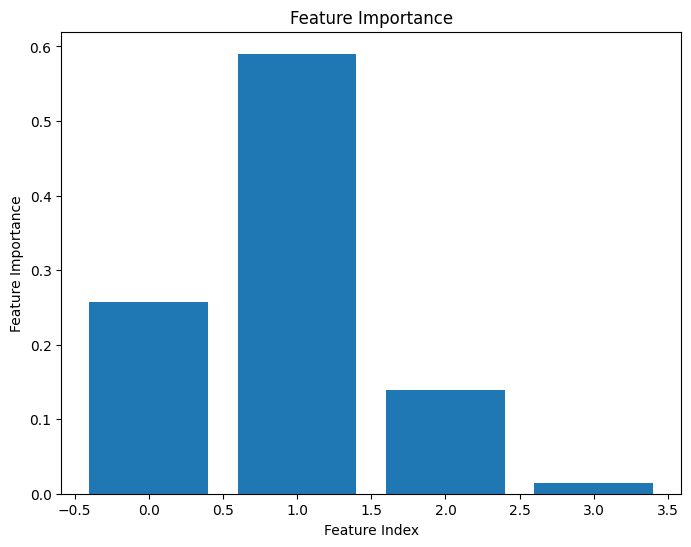

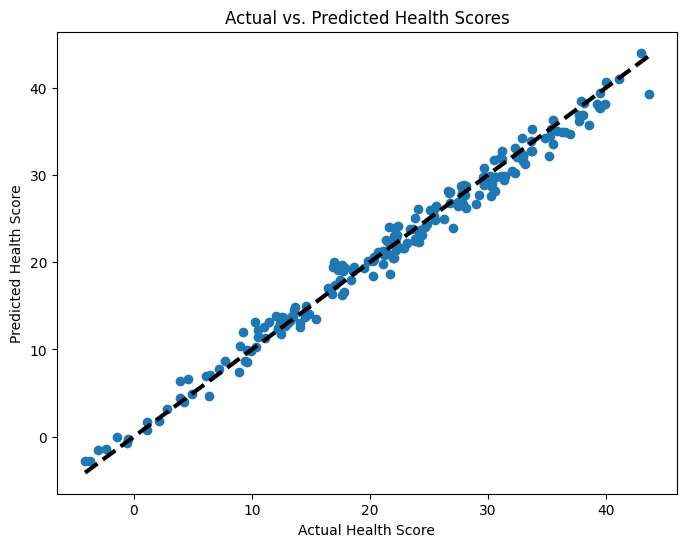

In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class ComplexSelfLearningModel:
    """
    A complex machine learning model that learns a mapping from financial
    indicators to a 'health score' using a GradientBoostingRegressor.
    It does not rely on external data, simulating an internal learning loop.
    This is a highly simplified demonstration.

    Key Indicators:
    - Current_Ratio: Current Assets / Current Liabilities
    - Debt_to_Equity_Ratio: Total Debt / Total Equity
    - Profit_Margin: Net Income / Revenue
    - ROE: Return on Equity (Net Income / Total Equity)
    """

    def __init__(self, n_estimators=100, learning_rate=0.1, random_state=42):
        """
        Initializes the model with a GradientBoostingRegressor.
        """
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.model = GradientBoostingRegressor(n_estimators=self.n_estimators,
                                               learning_rate=self.learning_rate,
                                               random_state=self.random_state)
        self.X = None  # Features (financial indicators)
        self.y = None  # Target values (health scores)

    def generate_synthetic_data(self, num_samples=1000):
        """
        Generates synthetic data for training and validation.
        In a real scenario, this data would come from your system.
        """
        rng = np.random.RandomState(42)  # for reproducibility
        self.X = rng.rand(num_samples, 4) * 10  # Random features
        self.y = 2 * self.X[:, 0] + 3 * self.X[:, 1] - 1.5 * self.X[:, 2] + 0.5 * self.X[:, 3] + rng.rand(num_samples)  # some relation
        return self

    def train(self):
        """
        Trains the GradientBoostingRegressor on the synthetic data.
        """
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        self.model.fit(X_train, y_train)

    def predict(self, features):
        """
        Predicts the health score given a set of features.
        """
        return self.model.predict(features.reshape(1, -1)) # Reshape the training data with the features in the model.

    def evaluate(self):
        """
        Evaluates the model on the test set.
        """
        if self.X is None or self.y is None:
            return

        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        y_pred = self.model.predict(X_test)
        from sklearn.metrics import mean_squared_error
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error: {mse}")

    def visualize_feature_importance(self):
        """
        Visualizes the feature importance of the Gradient Boosting model.
        """
        if self.X is None or self.y is None:
            print("No data available for visualization.")
            return

        feature_importances = self.model.feature_importances_
        plt.figure(figsize=(8, 6))
        plt.bar(range(self.X.shape[1]), feature_importances)
        plt.xlabel("Feature Index")
        plt.ylabel("Feature Importance")
        plt.title("Feature Importance")
        plt.show()

    def visualize_predictions(self):
        """
        Visualizes the predicted health scores against the actual health scores.
        """
        if self.X is None or self.y is None:
            print("No data available for visualization.")
            return

        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        y_pred = self.model.predict(X_test)

        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred)
        plt.xlabel("Actual Health Score")
        plt.ylabel("Predicted Health Score")
        plt.title("Actual vs. Predicted Health Scores")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # Add a diagonal line for reference
        plt.show()


# Example usage
model = ComplexSelfLearningModel()
model.generate_synthetic_data(num_samples=1000)
model.train()
model.evaluate()

# Visualize feature importance
model.visualize_feature_importance()

# Visualize predictions
model.visualize_predictions()

Conclusion:
The purpose of this model is to create a health score for companies based on their financial information. This model is created with machine learning and is for demonstrative purposes.  The scatter plot shows the actual health scores against the predicted health scores. The diagonal line added to the scatter plot is used to represent perfect prediction.

The two charts generated are:

**Feature Importance:** A bar chart showing the relative importance of each financial indicator in the model.

**Actual vs. Predicted Health Scores:** A scatter plot showing how well the model's predictions match the actual health scores. The closer the points are to the diagonal line, the better the model's performance.